In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


<div style="color: #333;
             display: flex;
             align-items: center;
             justify-content: center;
             border-radius: 15px;
             background-color: #2A9D8F;
             box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2);
             padding: 20px;">
    <h1 id="table-of-content"
        style="margin: 0;
               padding: 10px 20px;
               color: #FFFFFF;
               font-size: 28px;
               font-weight: bold;
               font-family: Arial, sans-serif;
               text-align: center;">
        1. Preparation
        <a class="anchor-link" id="table-of-content" 
           href="="color: #FFDDC1; 
                  text-decoration: none;
                  font-size: 24px; 
                  margin-left: 10px;">¶</a>
    </h1>
</div>


<div style="color: #333;
             display: flex;
             align-items: center;
             justify-content: center;
             border-radius: 15px;
             background-color: #2A9D8F;
             box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2);
             padding: 20px;">
    <h1 id="table-of-content"
        style="margin: 0;
               padding: 10px 20px;
               color: #FFFFFF;
               font-size: 28px;
               font-weight: bold;
               font-family: Arial, sans-serif;
               text-align: center;">
        1.1 Import Libraries
        <a class="anchor-link" id="table-of-content" 
           href="="color: #FFDDC1; 
                  text-decoration: none;
                  font-size: 24px; 
                  margin-left: 10px;">¶</a>
    </h1>
</div>


In [2]:
!pip install pywaffle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 59.6 MB/s eta 0:00:00


In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score, f1_score, 
                             precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
                              ExtraTreesClassifier, StackingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings("ignore")

from IPython.core.display import HTML

def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>"
    )


In [4]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [5]:
import joblib
print('The joblib version is {}.'.format(joblib.__version__))

The joblib version is 1.4.2.


In [6]:
import imblearn
print(imblearn.__version__)


0.12.3


<div style="color: #333;
             display: flex;
             align-items: center;
             justify-content: center;
             border-radius: 15px;
             background-color: #2A9D8F;
             box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.2);
             padding: 20px;">
    <h1 id="table-of-content"
        style="margin: 0;
               padding: 10px 20px;
               color: #FFFFFF;
               font-size: 28px;
               font-weight: bold;
               font-family: Arial, sans-serif;
               text-align: center;">
        1.2 Data Loading 
        <a class="anchor-link" id="table-of-content" 
           href="="color: #FFDDC1; 
                  text-decoration: none;
                  font-size: 24px; 
                  margin-left: 10px;">¶</a>
    </h1>
</div>


In [7]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [8]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [9]:
df.describe().style.background_gradient()

In [10]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
df.nunique().sort_values(ascending=True)

hypertension            2
Residence_type          2
ever_married            2
heart_disease           2
stroke                  2
gender                  3
smoking_status          4
work_type               5
age                   104
bmi                   418
avg_glucose_level    3979
id                   5110
dtype: int64

In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
sns.set(style="darkgrid")
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.fontsize"] = 10
# Custom color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

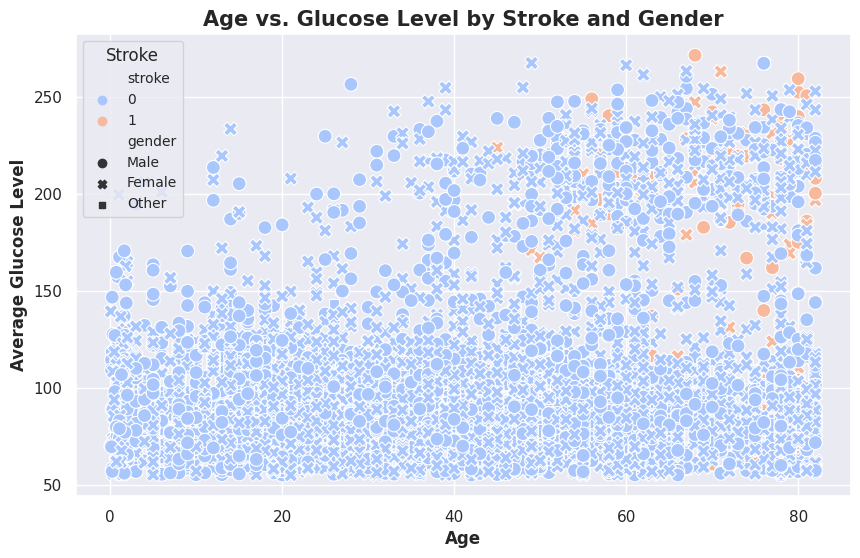

In [14]:
# 1. Age vs Stroke Cases by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', style='gender', palette='coolwarm', s=100)
plt.title("Age vs. Glucose Level by Stroke and Gender")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke")
plt.show()


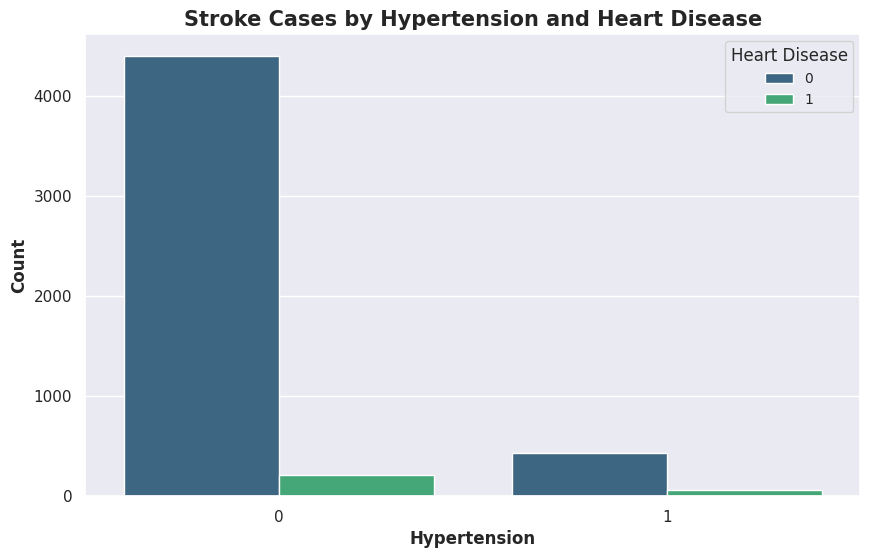

In [15]:
# 2. Hypertension and Heart Disease vs Stroke (Clustered Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hypertension', hue='heart_disease', palette="viridis")
plt.title("Stroke Cases by Hypertension and Heart Disease")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

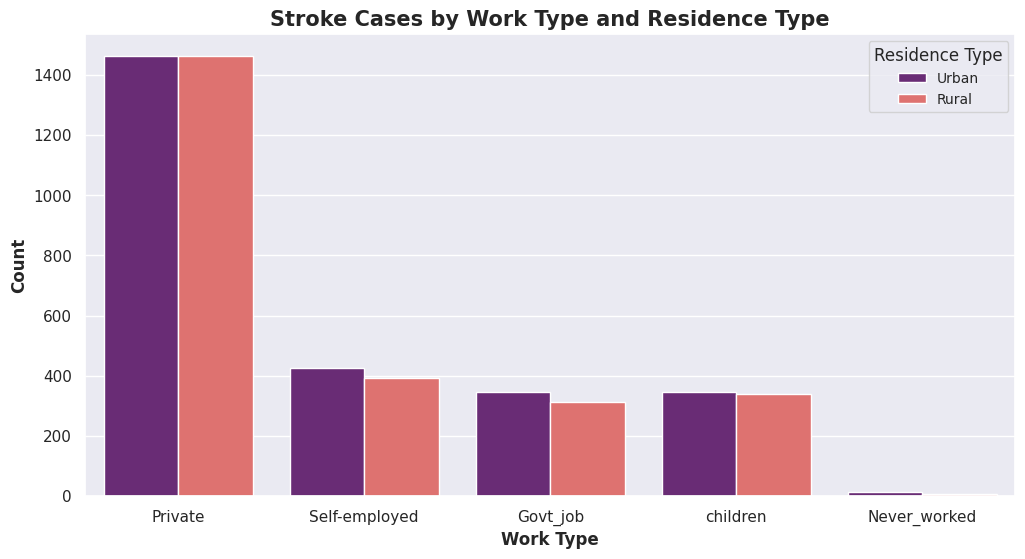

In [16]:
# 3. Stroke by Work Type and Residence Type (Stacked Bar Plot)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='work_type', hue='Residence_type', palette="magma")
plt.title("Stroke Cases by Work Type and Residence Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.legend(title="Residence Type")
plt.show()

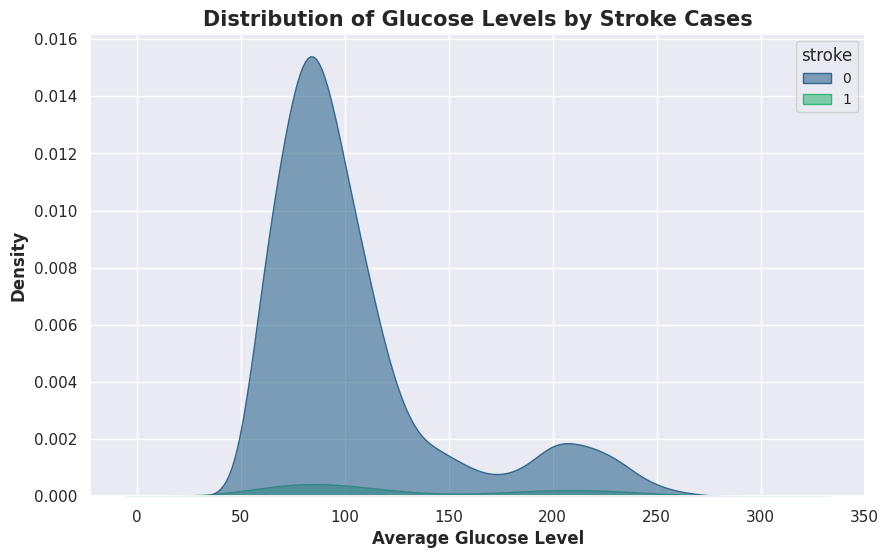

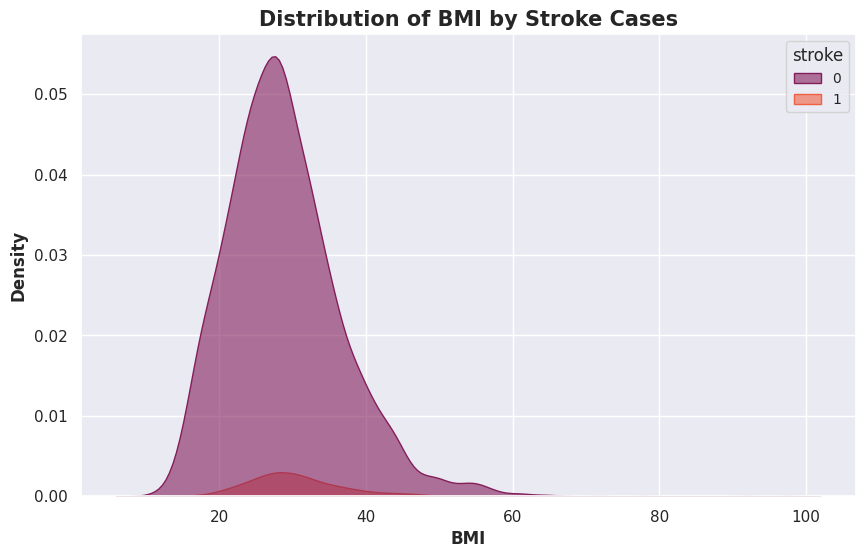

In [17]:
# 4. Glucose Level and BMI Distributions (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", fill=True, palette="viridis", alpha=0.6)
plt.title("Distribution of Glucose Levels by Stroke Cases")
plt.xlabel("Average Glucose Level")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="bmi", hue="stroke", fill=True, palette="rocket", alpha=0.6)
plt.title("Distribution of BMI by Stroke Cases")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

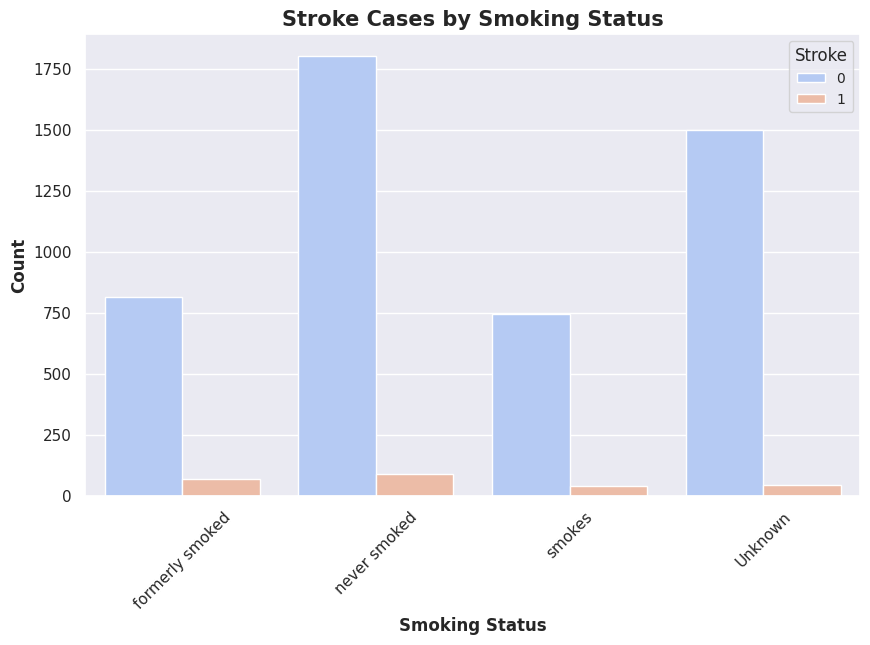

In [18]:
# 5. Smoking Status vs Stroke (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette="coolwarm")
plt.title("Stroke Cases by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Stroke")
plt.xticks(rotation=45)
plt.show()


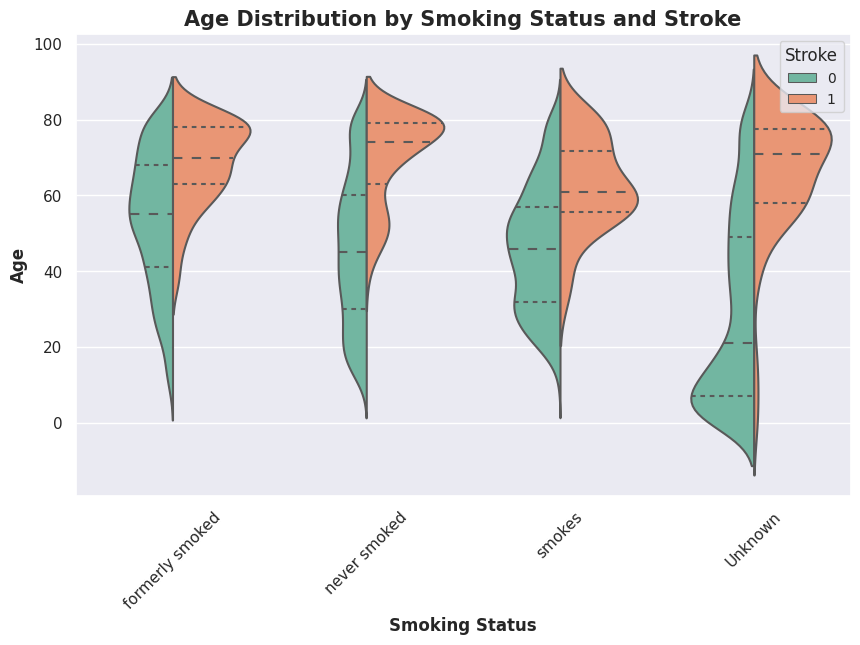

In [19]:
# Violin Plot - Distribution of Age by Stroke and Smoking Status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='smoking_status', y='age', hue='stroke', split=True, inner="quartile", palette="Set2")
plt.title("Age Distribution by Smoking Status and Stroke")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.legend(title="Stroke")
plt.show()

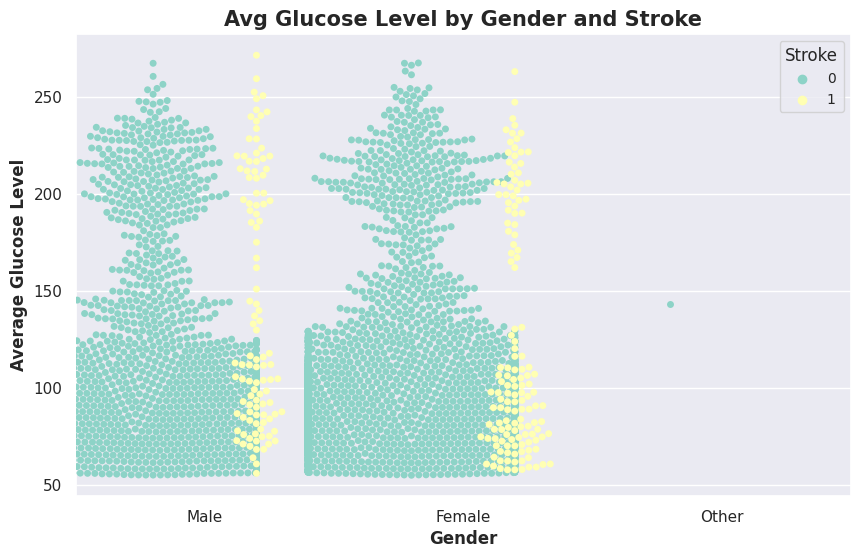

In [20]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='gender', y='avg_glucose_level', hue='stroke', palette="Set3", dodge=True)
plt.title("Avg Glucose Level by Gender and Stroke")
plt.xlabel("Gender")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke")
plt.show()

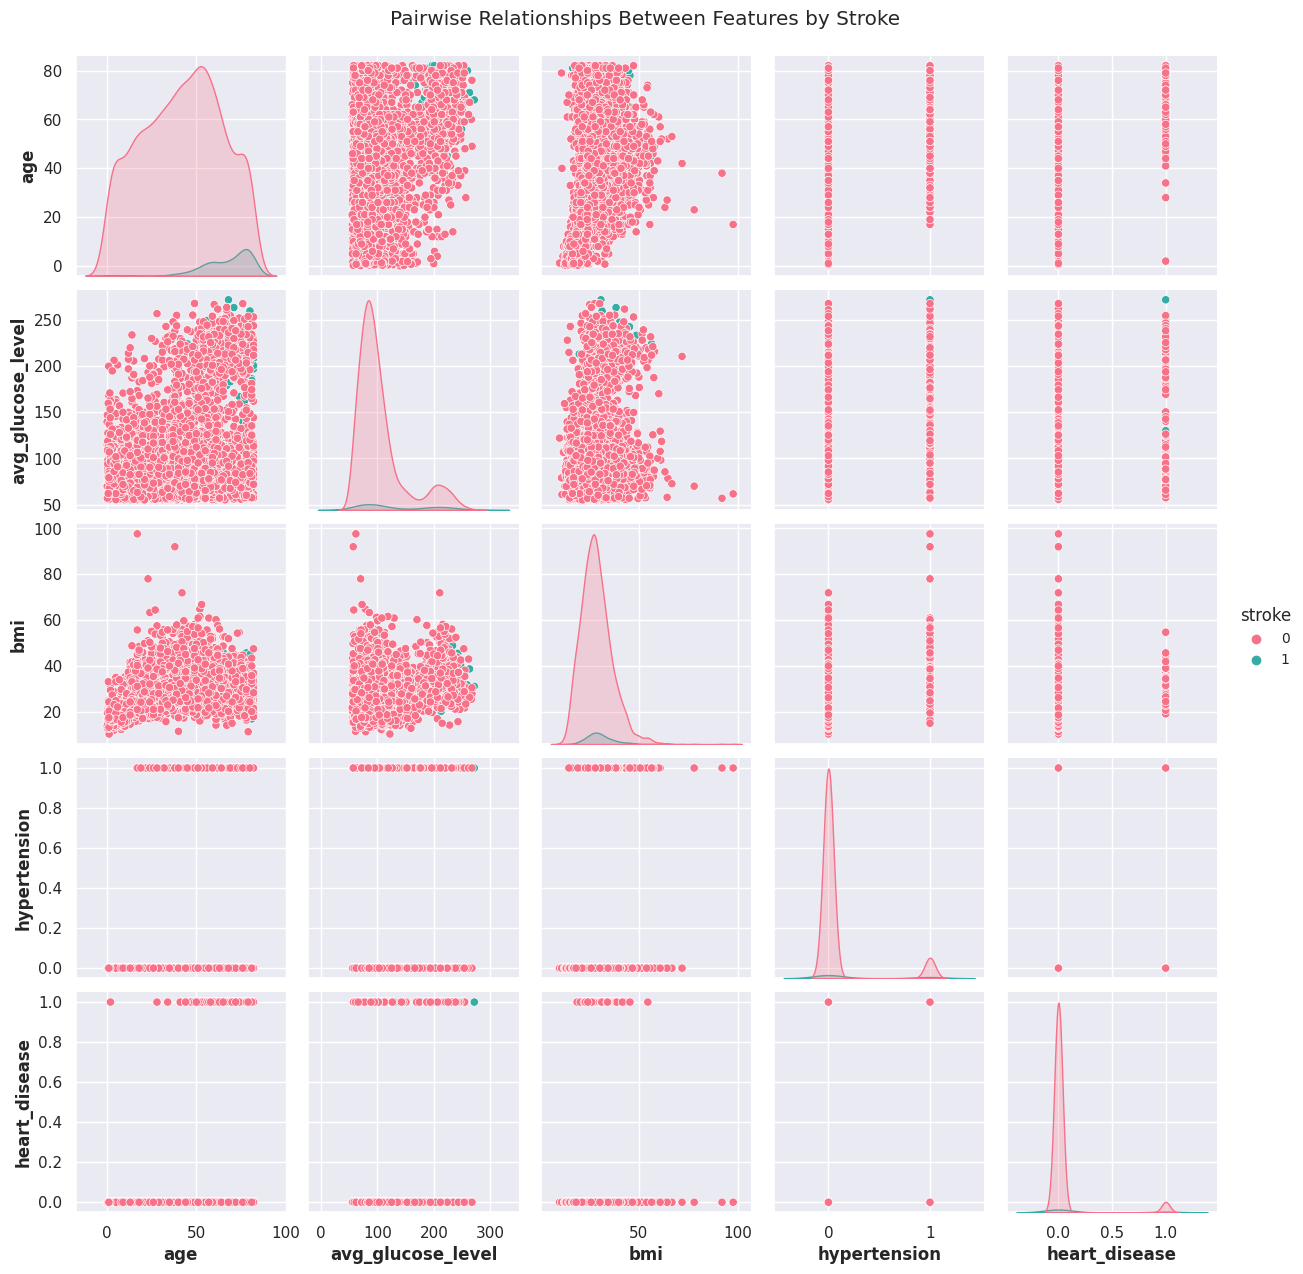

In [21]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']], hue='stroke', palette="husl")
plt.suptitle("Pairwise Relationships Between Features by Stroke", y=1.02)
plt.show()

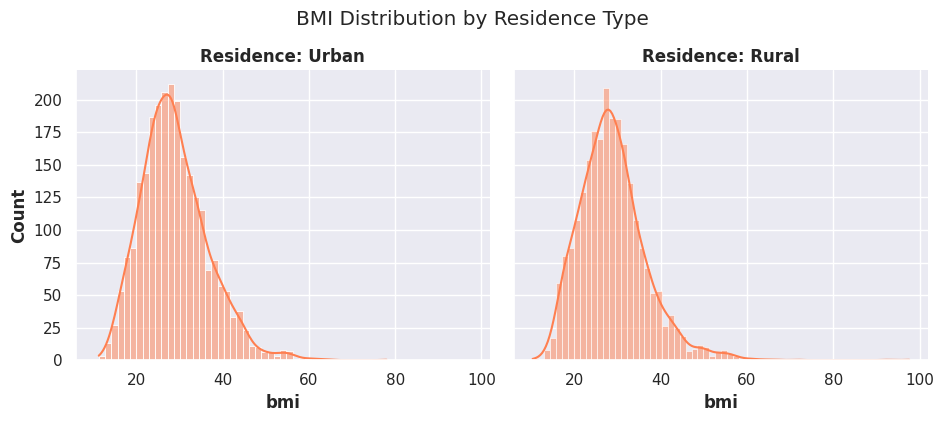

In [22]:
g = sns.FacetGrid(df, col="Residence_type", palette="muted", height=4, aspect=1.2)
g.map(sns.histplot, "bmi", kde=True, color="coral").set_titles("Residence: {col_name}")
g.fig.suptitle("BMI Distribution by Residence Type", y=1.05)
plt.show()

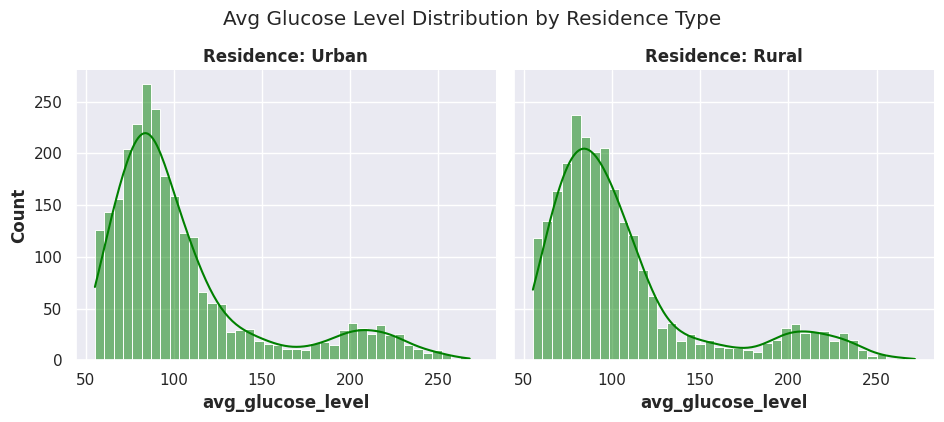

In [23]:
g = sns.FacetGrid(df, col="Residence_type", palette="muted", height=4, aspect=1.2)
g.map(sns.histplot, "avg_glucose_level", kde=True, color="green").set_titles("Residence: {col_name}")
g.fig.suptitle("Avg Glucose Level Distribution by Residence Type", y=1.05)
plt.show()

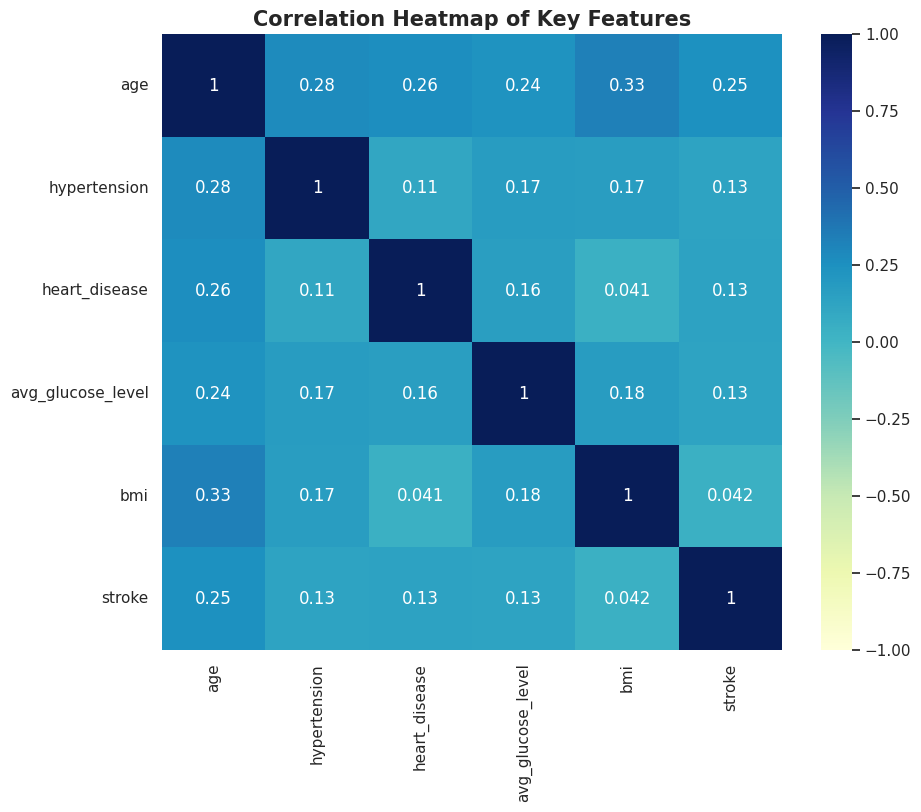

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Key Features")
plt.show()

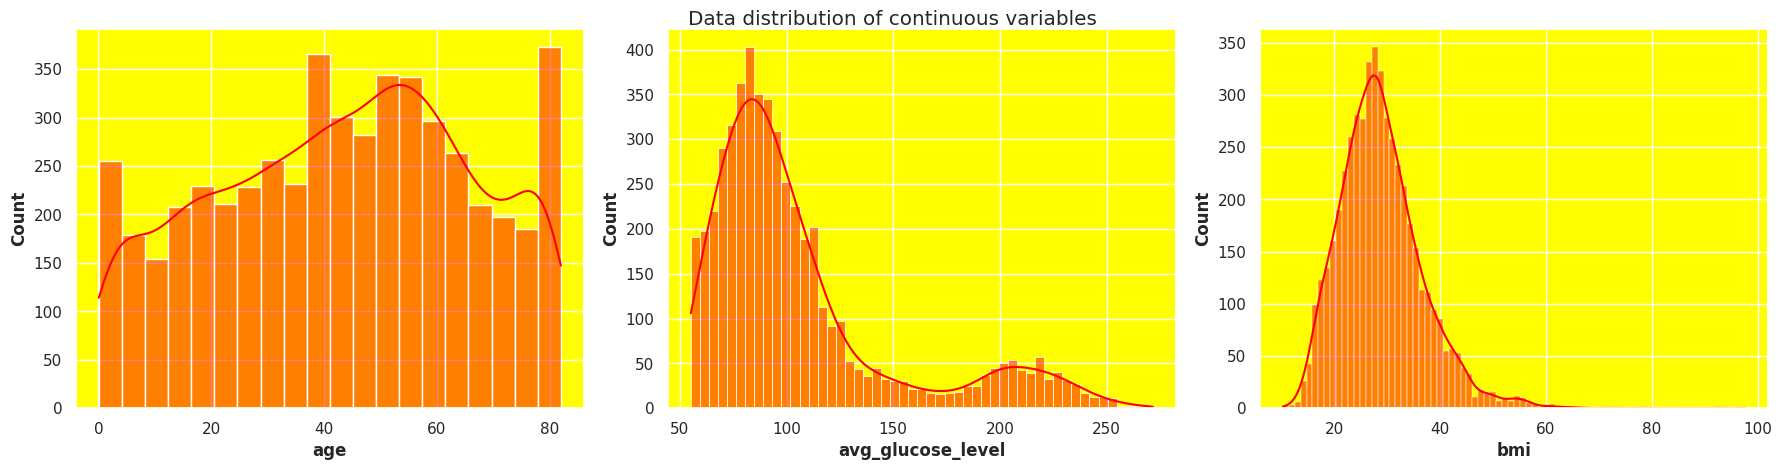

In [25]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'yellow'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

From the above graph we can see that there are a lot of attributes which are positively or negatively distributed.

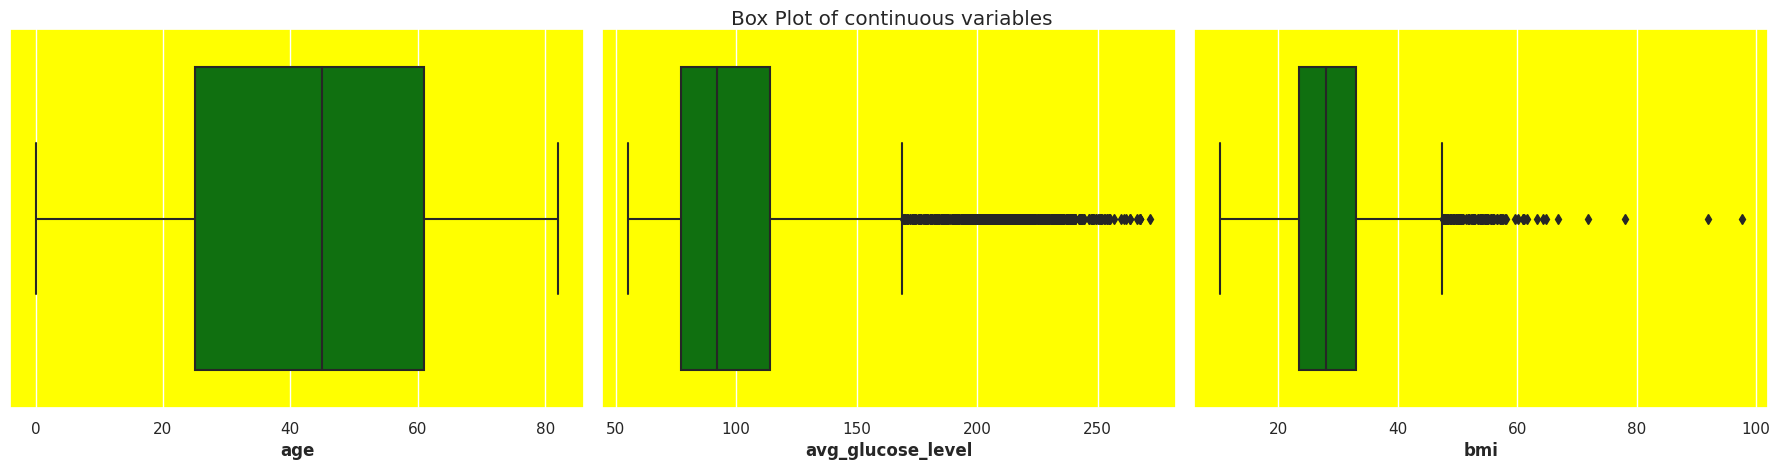

In [26]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'yellow'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='green')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [27]:
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function 
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [28]:
var=list(df.select_dtypes(include=['float64']).columns)
df=outlier_treating(df,var)

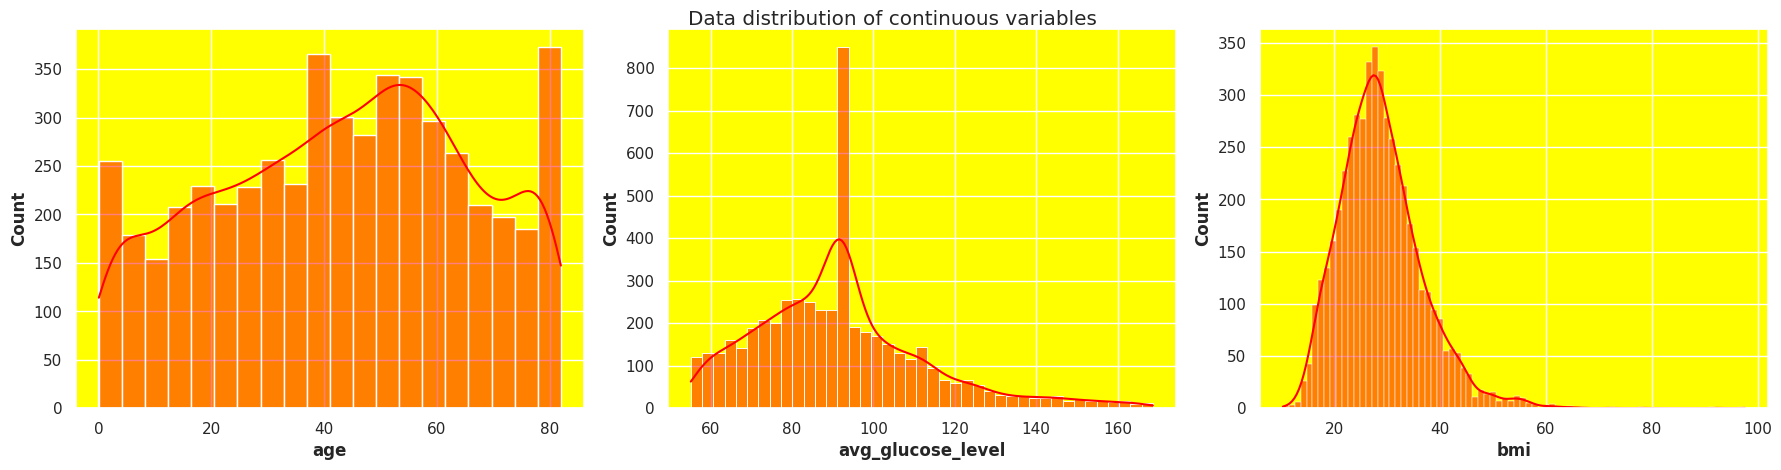

In [29]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'yellow'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

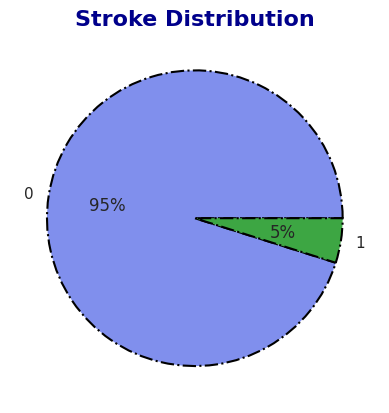

In [30]:
target_var = pd.crosstab(index=df['stroke'], columns='% observations')

colors = ['#808fed', '#3da643'] 

plt.pie(
    target_var['% observations'], 
    labels=target_var['% observations'].index, 
    autopct='%.0f%%', 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': '-.'}  
)

plt.title('Stroke Distribution', fontsize=16, fontweight='bold', color='darkblue')

plt.show()

In [31]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

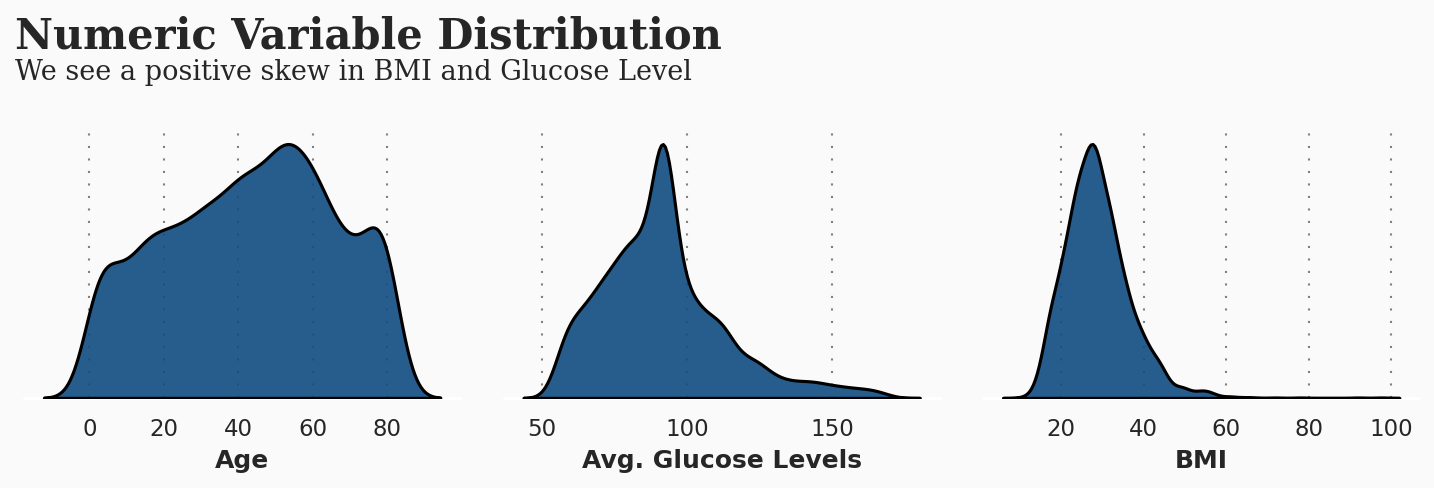

In [32]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

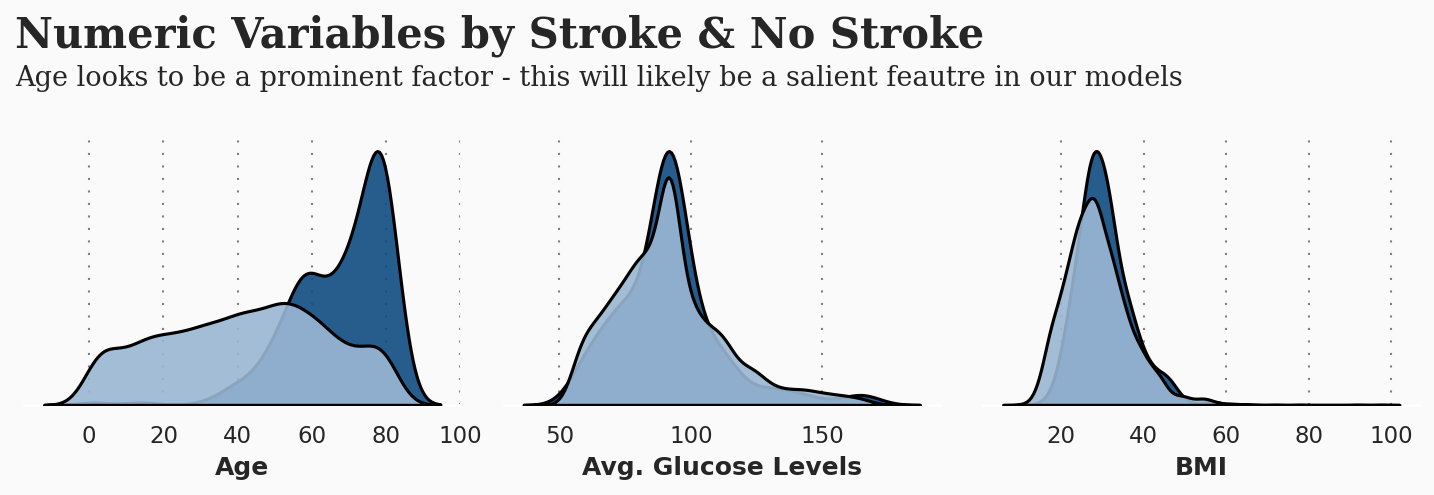

In [33]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

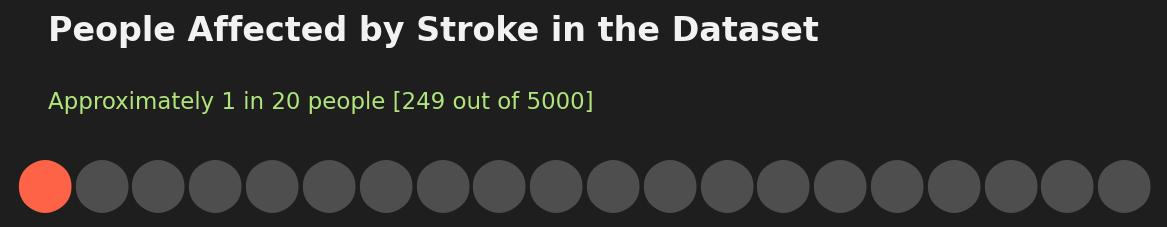

In [34]:
from pywaffle import Waffle

background_color = "#1e1e1e"  # Dark gray for the background
primary_color = "#ff6347"      # Tomato red for the highlighted part
secondary_color = "#4e4e4e"    # Dim gray for other blocks
text_color_main = "#f2f2f2"    # Light gray for main text
text_color_secondary = "#b0e57c" # Light green for secondary text

# Create the Waffle chart
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(8, 3), 
    dpi=150, 
    facecolor=background_color,
    rows=1, 
    values=[1, 19], 
    colors=[primary_color, secondary_color],
    characters='⬤', 
    font_size=25, 
    vertical=True, 
    block_arranging_style='snake'
)

# Add text with improved aesthetics
fig.text(0.05, 0.8, 'People Affected by Stroke in the Dataset', 
         fontfamily='sans-serif', fontsize=16, fontweight='bold', color=text_color_main)

fig.text(0.05, 0.65, 'Approximately 1 in 20 people [249 out of 5000]', 
         fontfamily='sans-serif', fontsize=11, color=text_color_secondary)

# Display the plot
plt.show()

In [35]:
knn_bmi_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))  # Set n_neighbors as needed
])

X = df[['age', 'gender', 'bmi']].copy()
X['gender'] = X['gender'].replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(np.uint8)

Missing = X[X['bmi'].isna()]
X = X[~X['bmi'].isna()]
Y = X.pop('bmi')

knn_bmi_pipe.fit(X, Y)

predicted_bmi = pd.Series(knn_bmi_pipe.predict(Missing[['age', 'gender']]), index=Missing.index)


df.loc[Missing.index, 'bmi'] = predicted_bmi


In [36]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [37]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [38]:
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [39]:
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
knn_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('KNN', KNeighborsClassifier())])
nb_gaussian_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('NB_Gaussian', GaussianNB())])
nb_bernoulli_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('NB_Bernoulli', BernoulliNB())])
mlp_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('MLP', MLPClassifier(max_iter=1000, random_state=42))])
xgb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('XGB', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))])
lgbm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LGBM', LGBMClassifier(random_state=42))])
catboost_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('CatBoost', CatBoostClassifier(silent=True, random_state=42))])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])
adaboost_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('AdaBoost', AdaBoostClassifier(random_state=42))])
extra_trees_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('ExtraTrees', ExtraTreesClassifier(random_state=42))])
decision_tree_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('DecisionTree', DecisionTreeClassifier(random_state=42))])


In [40]:
rf_cv = cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
svm_cv = cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
knn_cv = cross_val_score(knn_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
nb_gaussian_cv = cross_val_score(nb_gaussian_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
nb_bernoulli_cv = cross_val_score(nb_bernoulli_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
mlp_cv = cross_val_score(mlp_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
xgb_cv = cross_val_score(xgb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
lgbm_cv = cross_val_score(lgbm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
catboost_cv = cross_val_score(catboost_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
gb_cv = cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
adaboost_cv = cross_val_score(adaboost_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
extra_trees_cv = cross_val_score(extra_trees_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
decision_tree_cv = cross_val_score(decision_tree_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')

[LightGBM] [Info] Number of positive: 1311, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 2622, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1311, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 2622, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

In [41]:
# import pandas as pd
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_score, cross_val_predict

# # List of models with their names and pipelines
# models = [
#     ('Random Forest', rf_pipeline),
#     ('SVM', svm_pipeline),
#     ('Logistic Regression', logreg_pipeline),
#     ('K-Nearest Neighbors', knn_pipeline),
#     ('Naive Bayes - Gaussian', nb_gaussian_pipeline),
#     ('Naive Bayes - Bernoulli', nb_bernoulli_pipeline),
#     ('Multi-Layer Perceptron', mlp_pipeline),
#     ('XGBoost', xgb_pipeline),
#     ('LightGBM', lgbm_pipeline),
#     ('CatBoost', catboost_pipeline),
#     ('Gradient Boosting', gb_pipeline),
#     ('AdaBoost', adaboost_pipeline),
#     ('Extra Trees', extra_trees_pipeline),
#     ('Decision Tree', decision_tree_pipeline)
# ]

# leaderboard = []

# for model_name, pipeline in models:
#     f1 = cross_val_score(pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1').mean()
#     accuracy = cross_val_score(pipeline, X_train_resh, y_train_resh, cv=10, scoring='accuracy').mean()
#     precision = cross_val_score(pipeline, X_train_resh, y_train_resh, cv=10, scoring='precision').mean()
#     recall = cross_val_score(pipeline, X_train_resh, y_train_resh, cv=10, scoring='recall').mean()
#     leaderboard.append({
#         'Model': model_name,
#         'Mean F1 Score': f1,
#         'Mean Accuracy': accuracy,
#         'Mean Precision': precision,
#         'Mean Recall': recall
#     })


# leaderboard_df = pd.DataFrame(leaderboard).sort_values(by='Mean F1 Score', ascending=False)


# highlighted_leaderboard = leaderboard_df.style\
#     .highlight_max(subset=['Mean F1 Score', 'Mean Accuracy', 'Mean Precision', 'Mean Recall'], color='lightgreen')\
#     .set_caption("Model Leaderboard Sorted by Mean F1 Score")

# highlighted_leaderboard


In [42]:
rf_pipeline.fit(X_train_resh,y_train_resh)
extra_trees_pipeline.fit(X_train_resh,y_train_resh)
xgb_pipeline.fit(X_train_resh,y_train_resh)
lgbm_pipeline.fit(X_train_resh,y_train_resh)

#X = df.loc[:,X.columns]
#Y = df.loc[:,'stroke']

rf_pred   =rf_pipeline.predict(X_test)
extra_trees_pred  = extra_trees_pipeline.predict(X_test)
xgb_pred   = xgb_pipeline.predict(X_test)
lgbm_pred   =lgbm_pipeline.predict(X_test)


rf_cm  = confusion_matrix(y_test,rf_pred )
et_cm = confusion_matrix(y_test,extra_trees_pred)
xgb_cm  = confusion_matrix(y_test,xgb_pred )
lgbm_cm  = confusion_matrix(y_test,lgbm_pred )

rf_f1  = f1_score(y_test,rf_pred)
extra_tress_f1 = f1_score(y_test,extra_trees_pred)
xgb_f1  = f1_score(y_test,xgb_pred)
lgbm_f1 = f1_score(y_test,lgbm_pred)

[LightGBM] [Info] Number of positive: 1457, number of negative: 1457
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 2914, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [43]:
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(bootstrap=True, max_depth= None,  min_samples_leaf= 2, min_samples_split=5, n_estimators=500))])

rf_pipeline.fit(X_train_resh,y_train_resh)

rf_tuned_pred   = rf_pipeline.predict(X_test)
print(classification_report(y_test,rf_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_tuned_pred))
print('F1 Score: ',f1_score(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3404
           1       0.14      0.28      0.18       173

    accuracy                           0.88      3577
   macro avg       0.55      0.59      0.56      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8811853508526698
F1 Score:  0.18426103646833014


In [44]:
extra_trees_pipeline = Pipeline(steps = [('scale',StandardScaler()),('ET',ExtraTreesClassifier(max_depth=None,  min_samples_leaf= 2,  min_samples_split=5,  n_estimators= 500 ))])

extra_trees_pipeline.fit(X_train_resh,y_train_resh)

extra_trees_tuned_pred   = extra_trees_pipeline.predict(X_test)
print(classification_report(y_test,extra_trees_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,extra_trees_tuned_pred))
print('F1 Score: ',f1_score(y_test,extra_trees_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3404
           1       0.12      0.38      0.19       173

    accuracy                           0.84      3577
   macro avg       0.54      0.62      0.55      3577
weighted avg       0.92      0.84      0.88      3577

Accuracy Score:  0.8412077159630975
F1 Score:  0.18624641833810887


In [45]:
xgb_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('XGB', XGBClassifier(
        colsample_bytree=0.85,
        learning_rate=0.05,
        max_depth=8,
        n_estimators=500,
        subsample=0.75,
        device='cuda', 
        scale_pos_weight=len(y_train) / (2 * np.sum(y_train)),
        reg_alpha=0.8,
        reg_lambda=1.2,
        gamma=0.2
    ))
])

xgb_pipeline.fit(X_train_resh,y_train_resh)

xgb_tuned_pred   = xgb_pipeline.predict(X_test)
print(classification_report(y_test,xgb_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,xgb_tuned_pred))
print('F1 Score: ',f1_score(y_test,xgb_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3404
           1       0.12      0.37      0.18       173

    accuracy                           0.84      3577
   macro avg       0.54      0.62      0.55      3577
weighted avg       0.92      0.84      0.88      3577

Accuracy Score:  0.8398098965613643
F1 Score:  0.18259629101283878


In [46]:
lgbm_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('LGBM', LGBMClassifier(
        objective='binary',
        metric='binary_logloss',
        num_leaves=31,
        min_data_in_leaf=20,
        learning_rate=0.05,
        boosting_type='gbdt'
    ))
])

lgbm_pipeline.fit(X_train_resh,y_train_resh)

lgbm_tuned_pred   = lgbm_pipeline.predict(X_test)
print(classification_report(y_test,lgbm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,lgbm_tuned_pred))
print('F1 Score: ',f1_score(y_test,lgbm_tuned_pred))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1457, number of negative: 1457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 780
[LightGBM] [Info] Number of data points in the train set: 2914, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3404
           1       0.12      0.25      0.16       173

    accuracy                        

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


for i in range(1, 6):
    cm1 = 0
    y_pred1 = rf_pipeline.predict_proba(X_test)[:, 1]
    
    y_pred2 = (y_pred1 > (i / 10)).astype(int)  
    
    # Compute the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred2)

    # Print the results
    print('With', i / 10, 'threshold the Confusion Matrix is', '\n\n', cm1, '\n\n',
          'with', cm1[0, 0] + cm1[1, 1], 'correct predictions, ', '\n\n',
          cm1[0, 1], 'Type I errors (False Positives), ', '\n\n',
          cm1[1, 0], 'Type II errors (False Negatives), ', '\n\n',
          'Accuracy score: ', accuracy_score(y_test, y_pred2), '\n\n',
          'F1 score: ', f1_score(y_test, y_pred2), '\n\n',
          'Sensitivity: ', cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])), '\n\n',
          'Specificity: ', cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])), '\n\n',
          '====================================================', '\n\n')


With 0.1 threshold the Confusion Matrix is 

 [[1971 1433]
 [  21  152]] 

 with 2123 correct predictions,  

 1433 Type I errors (False Positives),  

 21 Type II errors (False Negatives),  

 Accuracy score:  0.5935141179759575 

 F1 score:  0.17292377701934017 

 Sensitivity:  0.8786127167630058 

 Specificity:  0.5790246768507638 



With 0.2 threshold the Confusion Matrix is 

 [[2463  941]
 [  64  109]] 

 with 2572 correct predictions,  

 941 Type I errors (False Positives),  

 64 Type II errors (False Negatives),  

 Accuracy score:  0.7190383002516075 

 F1 score:  0.17825020441537204 

 Sensitivity:  0.630057803468208 

 Specificity:  0.7235605170387779 



With 0.3 threshold the Confusion Matrix is 

 [[2753  651]
 [  87   86]] 

 with 2839 correct predictions,  

 651 Type I errors (False Positives),  

 87 Type II errors (False Negatives),  

 Accuracy score:  0.7936818563041655 

 F1 score:  0.189010989010989 

 Sensitivity:  0.49710982658959535 

 Specificity:  0.80875

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


for i in range(1, 6):
    cm1 = 0
    y_pred1 = extra_trees_pipeline.predict_proba(X_test)[:, 1]
    
    y_pred2 = (y_pred1 > (i / 10)).astype(int)  
    
    # Compute the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred2)

    # Print the results
    print('With', i / 10, 'threshold the Confusion Matrix is', '\n\n', cm1, '\n\n',
          'with', cm1[0, 0] + cm1[1, 1], 'correct predictions, ', '\n\n',
          cm1[0, 1], 'Type I errors (False Positives), ', '\n\n',
          cm1[1, 0], 'Type II errors (False Negatives), ', '\n\n',
          'Accuracy score: ', accuracy_score(y_test, y_pred2), '\n\n',
          'F1 score: ', f1_score(y_test, y_pred2), '\n\n',
          'Sensitivity: ', cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])), '\n\n',
          'Specificity: ', cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])), '\n\n',
          '====================================================', '\n\n')


With 0.1 threshold the Confusion Matrix is 

 [[1292 2112]
 [   5  168]] 

 with 1460 correct predictions,  

 2112 Type I errors (False Positives),  

 5 Type II errors (False Negatives),  

 Accuracy score:  0.40816326530612246 

 F1 score:  0.13697513249082754 

 Sensitivity:  0.9710982658959537 

 Specificity:  0.3795534665099882 



With 0.2 threshold the Confusion Matrix is 

 [[1902 1502]
 [  28  145]] 

 with 2047 correct predictions,  

 1502 Type I errors (False Positives),  

 28 Type II errors (False Negatives),  

 Accuracy score:  0.5722672630696114 

 F1 score:  0.15934065934065933 

 Sensitivity:  0.838150289017341 

 Specificity:  0.5587544065804936 



With 0.3 threshold the Confusion Matrix is 

 [[2425  979]
 [  58  115]] 

 with 2540 correct predictions,  

 979 Type I errors (False Positives),  

 58 Type II errors (False Negatives),  

 Accuracy score:  0.7100922560805144 

 F1 score:  0.1815311760063141 

 Sensitivity:  0.6647398843930635 

 Specificity:  0.7123

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


for i in range(1, 6):
    cm1 = 0
    y_pred1 = xgb_pipeline.predict_proba(X_test)[:, 1]
    
    y_pred2 = (y_pred1 > (i / 10)).astype(int)  
    
    # Compute the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred2)

    # Print the results
    print('With', i / 10, 'threshold the Confusion Matrix is', '\n\n', cm1, '\n\n',
          'with', cm1[0, 0] + cm1[1, 1], 'correct predictions, ', '\n\n',
          cm1[0, 1], 'Type I errors (False Positives), ', '\n\n',
          cm1[1, 0], 'Type II errors (False Negatives), ', '\n\n',
          'Accuracy score: ', accuracy_score(y_test, y_pred2), '\n\n',
          'F1 score: ', f1_score(y_test, y_pred2), '\n\n',
          'Sensitivity: ', cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])), '\n\n',
          'Specificity: ', cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])), '\n\n',
          '====================================================', '\n\n')


With 0.1 threshold the Confusion Matrix is 

 [[2509  895]
 [  73  100]] 

 with 2609 correct predictions,  

 895 Type I errors (False Positives),  

 73 Type II errors (False Negatives),  

 Accuracy score:  0.7293821638244339 

 F1 score:  0.17123287671232879 

 Sensitivity:  0.5780346820809249 

 Specificity:  0.7370740305522914 



With 0.2 threshold the Confusion Matrix is 

 [[2666  738]
 [  88   85]] 

 with 2751 correct predictions,  

 738 Type I errors (False Positives),  

 88 Type II errors (False Negatives),  

 Accuracy score:  0.7690802348336595 

 F1 score:  0.17068273092369476 

 Sensitivity:  0.4913294797687861 

 Specificity:  0.7831962397179788 



With 0.3 threshold the Confusion Matrix is 

 [[2776  628]
 [  92   81]] 

 with 2857 correct predictions,  

 628 Type I errors (False Positives),  

 92 Type II errors (False Negatives),  

 Accuracy score:  0.7987140061504053 

 F1 score:  0.1836734693877551 

 Sensitivity:  0.4682080924855491 

 Specificity:  0.81551

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


for i in range(1, 6):
    cm1 = 0
    y_pred1 = lgbm_pipeline.predict_proba(X_test)[:, 1]
    
    y_pred2 = (y_pred1 > (i / 10)).astype(int)  
    
    # Compute the confusion matrix
    cm1 = confusion_matrix(y_test, y_pred2)

    # Print the results
    print('With', i / 10, 'threshold the Confusion Matrix is', '\n\n', cm1, '\n\n',
          'with', cm1[0, 0] + cm1[1, 1], 'correct predictions, ', '\n\n',
          cm1[0, 1], 'Type I errors (False Positives), ', '\n\n',
          cm1[1, 0], 'Type II errors (False Negatives), ', '\n\n',
          'Accuracy score: ', accuracy_score(y_test, y_pred2), '\n\n',
          'F1 score: ', f1_score(y_test, y_pred2), '\n\n',
          'Sensitivity: ', cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])), '\n\n',
          'Specificity: ', cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])), '\n\n',
          '====================================================', '\n\n')


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
With 0.1 threshold the Confusion Matrix is 

 [[2360 1044]
 [  61  112]] 

 with 2472 correct predictions,  

 1044 Type I errors (False Positives),  

 61 Type II errors (False Negatives),  

 Accuracy score:  0.6910819122169416 

 F1 score:  0.16854778028592926 

 Sensitivity:  0.6473988439306358 

 Specificity:  0.6933019976498237 



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
With 0.2 threshold the Confusion Matrix is 

 [[2676  728]
 [  81   92]] 

 with 2768 correct predictions,  

 728 Type I errors (False Positives),  

 81 Type II errors (False Negatives),  

 Accuracy score:  0.7738328207995527 

 F1 score:  0.18529707955689828 

 Sensitivity:  0.5317919075144508 

 Specificity:  0.7861339600470035 



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be

In [51]:
# Random Forest Scores
rf_df = pd.DataFrame(data=[
    f1_score(y_test, rf_tuned_pred),
    accuracy_score(y_test, rf_tuned_pred),
    recall_score(y_test, rf_tuned_pred),
    precision_score(y_test, rf_tuned_pred),
    roc_auc_score(y_test, rf_tuned_pred)
], 
columns=['Random Forest Score'],
index=["F1", "Accuracy", "Recall", "Precision", "ROC AUC Score"])

# Extra Trees Scores
et_df = pd.DataFrame(data=[
    f1_score(y_test, extra_trees_tuned_pred),
    accuracy_score(y_test, extra_trees_tuned_pred),
    recall_score(y_test, extra_trees_tuned_pred),
    precision_score(y_test, extra_trees_tuned_pred),
    roc_auc_score(y_test, extra_trees_tuned_pred)
], 
columns=['Extra Trees Score'],
index=["F1", "Accuracy", "Recall", "Precision", "ROC AUC Score"])


xgb_df = pd.DataFrame(data=[
    f1_score(y_test, xgb_tuned_pred),
    accuracy_score(y_test, xgb_tuned_pred),
    recall_score(y_test, xgb_tuned_pred),
    precision_score(y_test, xgb_tuned_pred),
    roc_auc_score(y_test, xgb_tuned_pred)
], 
columns=['XGBoost Score'],
index=["F1", "Accuracy", "Recall", "Precision", "ROC AUC Score"])

# LightGBM Scores
lgbm_df = pd.DataFrame(data=[
    f1_score(y_test, lgbm_tuned_pred),
    accuracy_score(y_test, lgbm_tuned_pred),
    recall_score(y_test, lgbm_tuned_pred),
    precision_score(y_test, lgbm_tuned_pred),
    roc_auc_score(y_test, lgbm_tuned_pred)
], 
columns=['LightGBM Score'],
index=["F1", "Accuracy", "Recall", "Precision", "ROC AUC Score"])


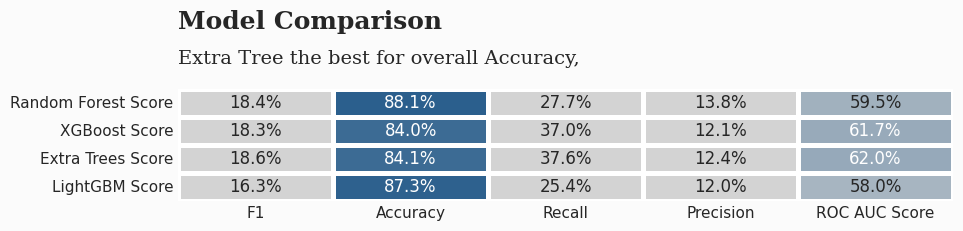

In [52]:
df_models = round(pd.concat([rf_df,xgb_df,et_df,lgbm_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Extra Tree the best for overall Accuracy,',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

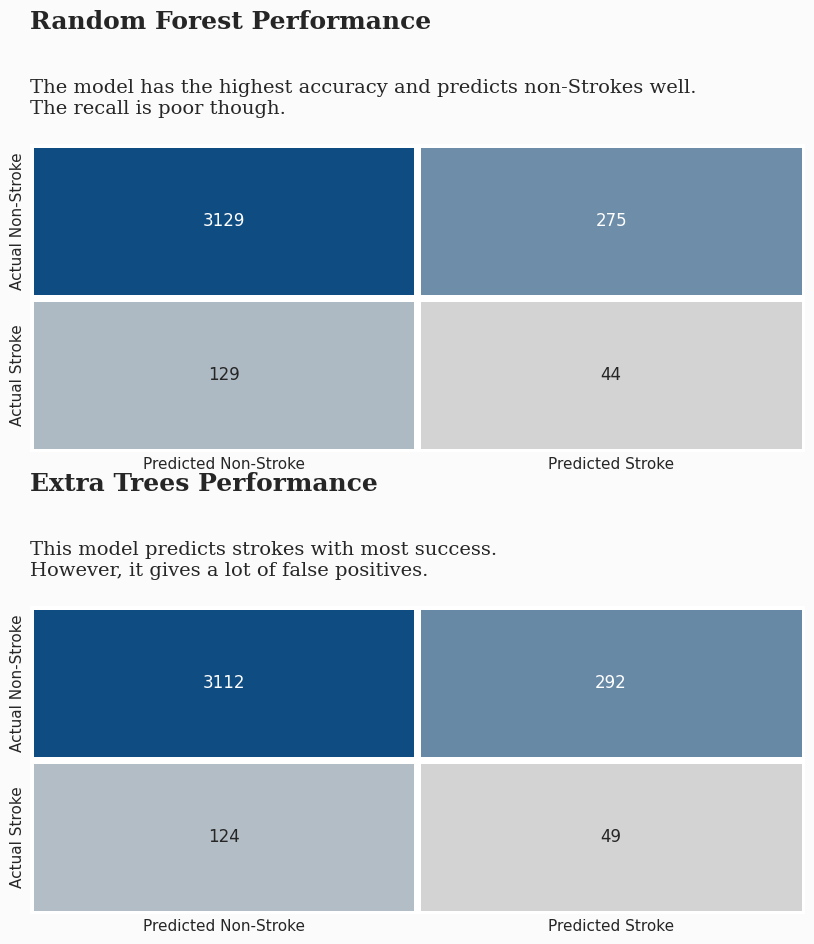

In [53]:


colors = ["lightgray", "#0f4c81", "#0f4c81", "#0f4c81", "#0f4c81", "#0f4c81", "#0f4c81", "#0f4c81"]
colormap = plt.cm.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

# Create the figure for Random Forest and Extra Trees
fig1 = plt.figure(figsize=(10, 10))
gs1 = fig1.add_gridspec(2, 1)
gs1.update(wspace=0.1, hspace=0.5)

ax0 = fig1.add_subplot(gs1[0, 0])
ax1 = fig1.add_subplot(gs1[1, 0])

# Set axes background color
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Plotting Random Forest
sns.heatmap(rf_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax0,
            yticklabels=['Actual Non-Stroke', 'Actual Stroke'], xticklabels=['Predicted Non-Stroke', 'Predicted Stroke'],
            annot_kws={"fontsize": 12})
ax0.text(0, -0.75, 'Random Forest Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.2, 'The model has the highest accuracy and predicts non-Strokes well.\nThe recall is poor though.', fontsize=14, fontfamily='serif')

# Plotting Extra Trees
sns.heatmap(et_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax1,
            yticklabels=['Actual Non-Stroke', 'Actual Stroke'], xticklabels=['Predicted Non-Stroke', 'Predicted Stroke'],
            annot_kws={"fontsize": 12})
ax1.text(0, -0.75, 'Extra Trees Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax1.text(0, -0.2, 'This model predicts strokes with most success.\nHowever, it gives a lot of false positives.', fontsize=14, fontfamily='serif')

for ax in [ax0, ax1]:
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_facecolor(background_color)

fig1.patch.set_facecolor(background_color)
plt.show()

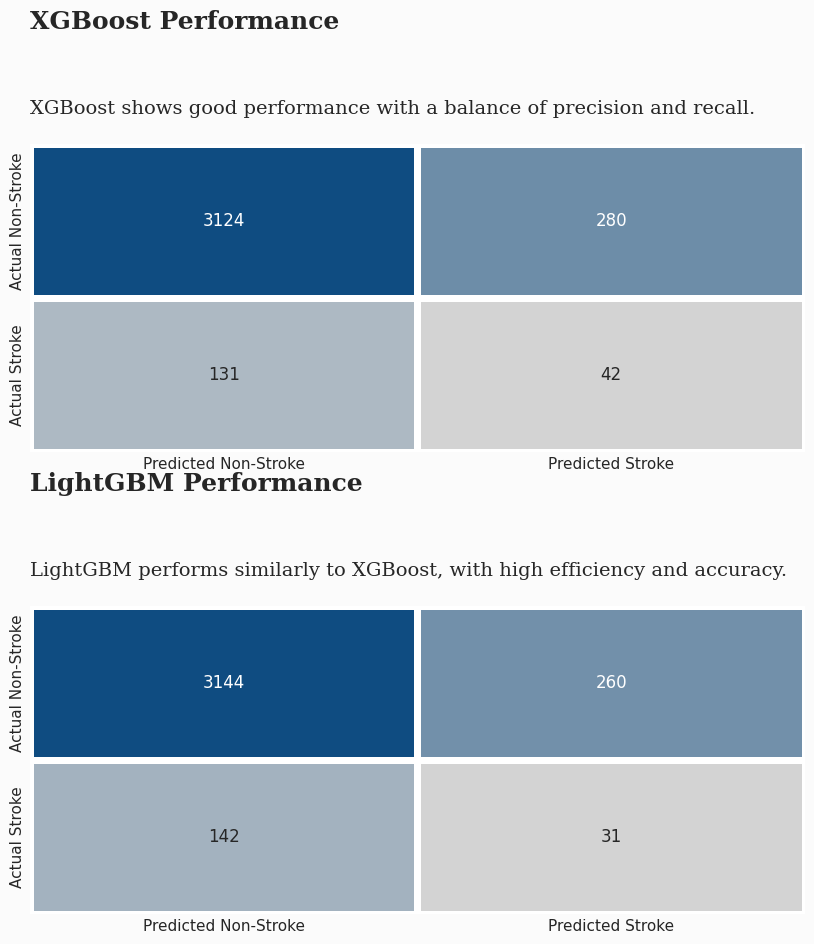

In [54]:
fig2 = plt.figure(figsize=(10, 10))
gs2 = fig2.add_gridspec(2, 1)
gs2.update(wspace=0.1, hspace=0.5)

ax2 = fig2.add_subplot(gs2[0, 0])
ax3 = fig2.add_subplot(gs2[1, 0])

# Set axes background color
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)

# Plotting XGBoost
sns.heatmap(xgb_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax2,
            yticklabels=['Actual Non-Stroke', 'Actual Stroke'], xticklabels=['Predicted Non-Stroke', 'Predicted Stroke'],
            annot_kws={"fontsize": 12})
ax2.text(0, -0.75, 'XGBoost Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.2, 'XGBoost shows good performance with a balance of precision and recall.', fontsize=14, fontfamily='serif')

# Plotting LightGBM
sns.heatmap(lgbm_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax3,
            yticklabels=['Actual Non-Stroke', 'Actual Stroke'], xticklabels=['Predicted Non-Stroke', 'Predicted Stroke'],
            annot_kws={"fontsize": 12})
ax3.text(0, -0.75, 'LightGBM Performance', fontsize=18, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.2, 'LightGBM performs similarly to XGBoost, with high efficiency and accuracy.', fontsize=14, fontfamily='serif')

for ax in [ax2, ax3]:
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_facecolor(background_color)

fig2.patch.set_facecolor(background_color)
plt.show()

In [55]:
import lime
import lime.lime_tabular


explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=['stroke'], verbose=True, mode='classification')
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp = explainer.explain_instance(X.values[j], extra_trees_pipeline.predict_proba, num_features=5)

# Show the predictions
exp.show_in_notebook(show_table=True)

Intercept 0.21140539290051946
Prediction_local [0.24346644]
Right: 0.3219882039167316


In [56]:
X_test

gender   age  hypertension  heart_disease  work_type  avg_glucose_level  \
4688       0  31.0             0              0          1              64.85   
4478       0  40.0             0              0          1              65.29   
3849       1   8.0             0              0        255              74.42   
4355       1  79.0             1              0          1              76.64   
3826       1  75.0             0              0          2              94.77   
...      ...   ...           ...            ...        ...                ...   
284        0  14.0             0              0          2              82.34   
686        0  32.0             0              0          0              94.34   
703        1  66.0             0              0          0             102.07   
3341       1  59.0             0              0          0             134.24   
2353       1   5.0             0              0        255             122.25   

       bmi  
4688  23.0  
4478  28.3  
3849  22.5  
4355  19.5  
3826  27.2  
...    ...  
284   31.6  
686   30.2  
703   16.7  
3341  28.8  
2353  16.7  

[3577 rows x 7 columns]

Stacked Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      3404
           1       0.14      0.28      0.18       173

    accuracy                           0.88      3577
   macro avg       0.55      0.59      0.56      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8811853508526698
F1 Score:  0.18426103646833014


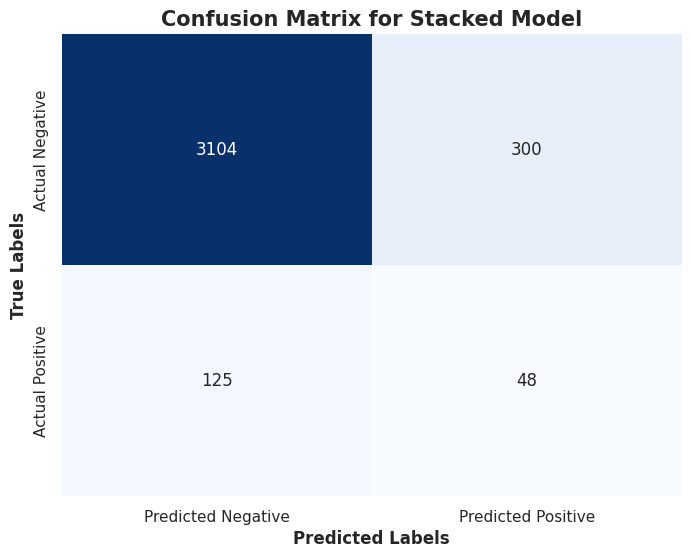

In [57]:
stacking_pipeline = StackingClassifier(
    estimators=[
        ('rf', rf_pipeline),
        ('et', extra_trees_pipeline)
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict'
)

# Fit the stacking model
stacking_pipeline.fit(X_train_resh, y_train_resh)

# Predict using the stacked model
stacked_pred = stacking_pipeline.predict(X_test)

# Print evaluation metrics
print("Stacked Model Classification Report:\n", classification_report(y_test, stacked_pred))
print("Accuracy Score: ", accuracy_score(y_test, stacked_pred))
print("F1 Score: ", f1_score(y_test, stacked_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, stacked_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Stacked Model")
plt.show()

In [58]:
print(type(stacking_pipeline))  


<class 'sklearn.ensemble._stacking.StackingClassifier'>


In [59]:
stacking_pipeline

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('scale', StandardScaler()),
                                                ('RF',
                                                 RandomForestClassifier(min_samples_leaf=2,
                                                                        min_samples_split=5,
                                                                        n_estimators=500))])),
                               ('et',
                                Pipeline(steps=[('scale', StandardScaler()),
                                                ('ET',
                                                 ExtraTreesClassifier(min_samples_leaf=2,
                                                                      min_samples_split=5,
                                                                      n_estimators=500))]))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict')

In [60]:
 import joblib
joblib.dump(stacking_pipeline, 'stacking_pipeline_model.pkl')

print("Model saved as 'stacking_pipeline_model.pkl'")

Model saved as 'stacking_pipeline_model.pkl'


In [61]:
# For a NumPy array or Pandas DataFrame/Series
print(stacked_pred[:1000])  # Show the first 10 values


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [62]:
# import warnings
# warnings.filterwarnings("ignore")


# best_xgb_params = {
#     'colsample_bytree': 0.85, 
#     'learning_rate': 0.05,  
#     'max_depth': 8,  
#     'n_estimators': 500, 
#     'subsample': 0.75, 
#     'device': 'cuda', 
#     'scale_pos_weight': len(y_train_res) / (2 * np.sum(y_train_res)), 
#     'reg_alpha': 0.8,  
#     'reg_lambda': 1.2, 
#     'gamma': 0.2  
# }

# best_rf_params = {
#     'bootstrap': True, 
#     'max_depth': None,  
#     'min_samples_leaf': 2, 
#     'min_samples_split': 5, 
#     'n_estimators': 500
    
# }

# best_lgb_params = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'num_leaves': 31, 
#     'min_data_in_leaf': 20, 
#     'learning_rate': 0.05,
#     'boosting_type': 'gbdt',
#     'is_unbalance': True,
#     'force_col_wise':True
# }

# best_et_params = {
#     'max_depth': None,  
#     'min_samples_leaf': 2,  
#     'min_samples_split': 5,  
#     'n_estimators': 500,  
# }



# xgb_model = XGBClassifier(**best_xgb_params)
# rf_model = RandomForestClassifier(**best_rf_params)
# lgb_model = LGBMClassifier(**best_lgb_params)
# et_model = ExtraTreesClassifier(**best_et_params)


# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# def evaluate_model(model, X_train, y_train, X_test, y_test, model_name=""):
#     cv_auc_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
#     model.fit(X_train, y_train)
    

#     y_train_pred = model.predict(X_train)
#     y_train_proba = model.predict_proba(X_train)[:, 1]
    

#     y_test_pred = model.predict(X_test)
#     y_test_proba = model.predict_proba(X_test)[:, 1]
    

#     metrics = {
#         'Model': model_name,
#         'CV AUC': f"{np.mean(cv_auc_scores):.4f} ± {np.std(cv_auc_scores):.4f}",
#         'Train Accuracy': accuracy_score(y_train, y_train_pred),
#         'Test Accuracy': accuracy_score(y_test, y_test_pred),
#         'Test AUC': roc_auc_score(y_test, y_test_proba),
#         'Test Precision': precision_score(y_test, y_test_pred),
#         'Test Recall': recall_score(y_test, y_test_pred),
#         'Test F1 Score': f1_score(y_test, y_test_pred),
#     }
    
#     print(f"\n{model_name} Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
#     print(f"{model_name} Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))
    
#     return metrics, y_test_pred, y_test_proba


# metrics_list = []
# for model, name in zip([xgb_model, rf_model, lgb_model, et_model], 
#                        ["XGBoost", "Random Forest", "LightGBM", "Extra Trees"]):
#     metrics, y_test_pred, y_test_proba = evaluate_model(model, X_train_res, y_train_res, X_test, y_test, model_name=name)
#     metrics_list.append(metrics)


# metrics_df = pd.DataFrame(metrics_list)
# print("\nEvaluation Metrics Summary:")
# print(metrics_df)

In [63]:


# def plot_evaluation_metrics(model, X_test, y_test, model_name=""):
#     y_test_pred = model.predict(X_test)
#     y_test_proba = model.predict_proba(X_test)[:, 1]
    
#     sns.set(style="whitegrid")

#     fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
#     ConfusionMatrixDisplay.from_predictions(
#         y_test, 
#         y_test_pred, 
#         ax=ax[0], 
#         cmap='Blues',  
#         colorbar=False
#     )
#     ax[0].set_title(f"{model_name} - Confusion Matrix", fontsize=16)
#     ax[0].set_xlabel('Predicted Label', fontsize=14)
#     ax[0].set_ylabel('True Label', fontsize=14)
#     ax[0].tick_params(axis='both', labelsize=12)


#     RocCurveDisplay.from_predictions(y_test, y_test_proba, ax=ax[1], color='blue', lw=2)
#     ax[1].set_title(f"{model_name} - ROC Curve", fontsize=16)
#     ax[1].set_xlabel('False Positive Rate', fontsize=14)
#     ax[1].set_ylabel('True Positive Rate', fontsize=14)
#     ax[1].tick_params(axis='both', labelsize=12)


#     ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
#     ax[1].legend(loc='lower right', fontsize=12)


#     plt.tight_layout()
#     plt.show()


# for model, name in zip([xgb_model, rf_model, lgb_model, et_model], 
#                        ["XGBoost", "Random Forest", "LightGBM", "Extra Trees"]):
#     plot_evaluation_metrics(model, X_test, y_test, model_name=name)

In [64]:

# import warnings
# warnings.filterwarnings("ignore")



# estimators = [
#     ('xgb', xgb_model),
#     ('rf', rf_model),
#     ('lgb', lgb_model),
#     ('et', et_model)
# ]


# stacking_model = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(),  
#     cv=kfold,
#     stack_method='predict_proba',  
#     n_jobs=-1  
# )


# stacking_metrics, y_test_pred, y_test_proba = evaluate_model(
#     stacking_model, X_train_res, y_train_res, X_test, y_test, model_name="Stacking Model"
# )


# metrics_list.append(stacking_metrics)
# metrics_df = pd.DataFrame(metrics_list)


# print("\nEvaluation Metrics Summary (Including Stacking Model):")
# print(metrics_df)
